## Creacion de un proyecto de machin learnin

En este ejercicio se trabajara a travez de un proyecto de ejemplo de inicio a fin, haciendose pasar por un cientifico de datos recien contratado en una empresa inmobiliaria. Este ejemplo es ficticio; el objetivo es ilustrar los pasos principales de un proyecto de **machine learning**, no es aprender nada acerca de los negocios estatales. Los pasos principales por los que se trabajaran son:

1. Tener una imagen complenta.
2. Obtener los datos.
3. Explorar y visualizar los datos para obtener informacion.
4. Preparar los datos para los algoritmos de machine learning.
5. Seleccionar el modelo y entrenarlo.
6. Afinar y tunear el modelo.
7. Presentar las soluciones
8. Lanzar el modelo y mantener el sistema.


### Ejemplo: Precios de vivienda en California

En este ejmplo se utilizara un dataset de los precios de las viviendas de casas en California del repositorio *StatLib*. Este dataset esta basado en datos del ceso de California en 1990. No son datos recientes pero tienen bastantes cualidades para aprender

#### 1. Vista general

El objetivo es usar los datos del senso California para construir un modelo de precio de vivienda en el estado. Estos datos incluyen metricas como, la poblacion, el ingreso medio, y precio medio de vivienda para cada bloque de grupo en California. Los bloques de grupos son la unidad geografica mas pequeña para la cual la oficina del censo de EE.UU publica datos de muestra (Un grupo suele tener una poblacion de 600 a 3000 personas). Se llamaran *"distritos"* para abreviar. El modelo deberia aprender de estos datos y poder predecir el precio medio de la vivienda en cualquier distrito teniendo en cuenta todas las metricas

**Planteamiento del problema:**  
La primera pregunta que probablemente realizaran es 
- Cual es exactamente el objetivo comercial? 
- Como espera la compañia utilizar y beneficiarse de este modelo?

Construir el modelo probablemente no es el objetivo final. Conocer el objetivo es importante porque determinara como planter el problema, que algoritmos se seleccionaran, que medidas de desempeño se utilizaran para evaluar el model, y que tanto esfuerzo sera dedicado para modificarlo.  
  
El director del proyecto informa que el resultado del modelo sera enviado a otro sistema de aprendizaje automatico, junto con muchas otras señale. Este sistema posterior determinara si vale la pena invertir en un area determinada. Hacer esto es fundamental ya que afecta directamente a los ingresos.  
  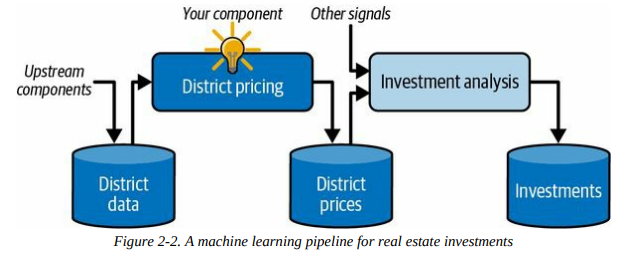
La siguiente pregunta que debe hacerle a su jefe es
- Como es la solucion actual?  

La situacion actual comunmente brindara una referencia de desempeño, asi como tambien ideas de como resolver el problema. Su jefe responde que actualmente los precion de las viviendas en los distritos los calculan manualmente expertos: un equipo recopila informacion actualizada sobre un distrito y cuando no pueden obtener el precio medio de las viviendas, lo estimas utilizando reglas complejas. Esto es costoso y lleva mucho tiempo y sus estimaciones no son muy buenas;en casos cuando lograan averiguar el precio medio real de la vivienda, a menudo se dan cuenta que sus estimaciones equivocadas en mas del 30%. Por  eso la empresa cree que seria util entrenar un modelo para predecir la evolucion de un distrito. Los datos del censo parecen un gran conjunto de datos para explotar con este proposito, ya que incluyen los precios medios de la vivienda de miles de distritos, asi como otros datos.  
  
Con toda esta informacion, usted esta listo para iniciar a diseñanar su sistema. Primero se debe determinar que tipo de modelo de supervision de entrenamiento necesitara el modelo.  

- Aprendizaje supervisado
- Aprendizaje no supervisado
- Aprendizaje semi-supervisado
- Aprendizaje auto-supervisado
- Aprendizaje reforzado
Ademas si se trata de una
- Tarea de clasificacion
- Tarea de regresion
- o algo mas
  
Este ejemplo es claramento una tarea tipica de aprendizaje supervisado, ya que el modelo se puede entrenar con ejemplos etiquetados. Mas especificamente este es un problema de regresion multiple ya que el sistema utilizara multiples caracteristicas para hacer una prediccion. Este tambien un problema de regresion univariable ya que se esta intentando predecir un unico valor para cada distrito. Finalmente hay un flujo no continuo de datos de entrada al sistema, no hay necesidad particular de adaptarse a los ambios rapidos de datos, y los datos son lo suficientemente pequeños como para caber en la memoria, por lo que el aprendizaje por lotes simple deberia funcionar bin.



**Seleccionar la medida de desempeño**  
  
El siguiente paso es seleccionar la medida de desempeño, Una medida tipica para problemas de regresion es la raiz del error cuadrado medio (RMSE *root mean square error*). Esto da una idea de la cantidad de error en un sistema al realizar sus predicciones.
$$RMSE(X,h)=\frac{1}{m}\sum_{i=1}^m [h(x^{(i)})-y^{(i)}]^2$$

* $m$ es el numero de muestras en el dataset que son medidos
* $x(i)$ es un vecto de todas los valores de las caracteristiscas del i-esimo dato, y $y^{i}$ es la etiqueta (Valor deseado o valor de salida para esa instancia)
* $X$ es una matriz que contiene todos los valores de caracteristicas de todas las instancias
* $h$ es la funcion de prediccion, tambien llamada hipotesis.
* RMSE ES LA FUNCION DE COSTO


#### 2) Descargar los datos
En un ambiente tipico sus dato deberian estar disponibles en una base de datos relacionales o algun otro sistema de almacenamiento, extendido a traves de multiples tablas/documentos/archivos. En este proyecto las cosas son mas simples, solo es necesario descargar un archivo comprimido *housing.tgz* el cual contiene una hoja de calculo (CSV).  
  
En lugar de descargar manualmente y descomprimir los dato, usualmente es preferible escribir una funcion que haga esto por ti. Esto es particularmente util si los datos cambian regularmente.

In [40]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

In [41]:
housing = load_housing_data()

Heche una vista rapida de la estructura de datos

In [42]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Cada fila representa un distrito, hay 10 atributos
  
El metod *info()* es util para tener una breve descripcion de los datos, en particular el numero de filas y el tipo de dato de cada atributo, y el numero de valores no nulo

In [43]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


hay un total de 20,640, lo que significa que es bastante pequeño segun los estandares del aprendizaje automatico, pero es perfecto para comenzar. Observa que el atributo *total_bedrooms* tiene solo 20433 valores no nulos, lo que significa que a 207 distritos les falta esta caracteristica. Nos encargaremos de esto mas tarde.  
  
Todos los atributos son numericos excepto la proximidad al oceano. Este es un tipo *Object*, entonces podria ser cualquier tipo de objeto. Pero desde que se cargaron los datos del CSV, se sabe que es un atributo de texto. Al observar las primeras 5 filas te pudiste dar cuenta  que los valores en *ocean_proximity* eran repetitivos, lo que significa que es probable que sea un atributo categorico. puedes ecnontrar que categorias existen y cuantos distritos pertenecen a cada categoria utilizando el metodo *value_counts*

In [44]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [45]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Otro camino rapido para observar el tipo de datos  que esta tratando de ver es trazar un histograma para cada atributo numerico. Un histograma muestra el numero de instancias (en el eje vertical) que tiene un rango de valores (en el eje horizontal). Tu puedes dibujar los atributos en el tiempo  o llamar el metodo *hist()*

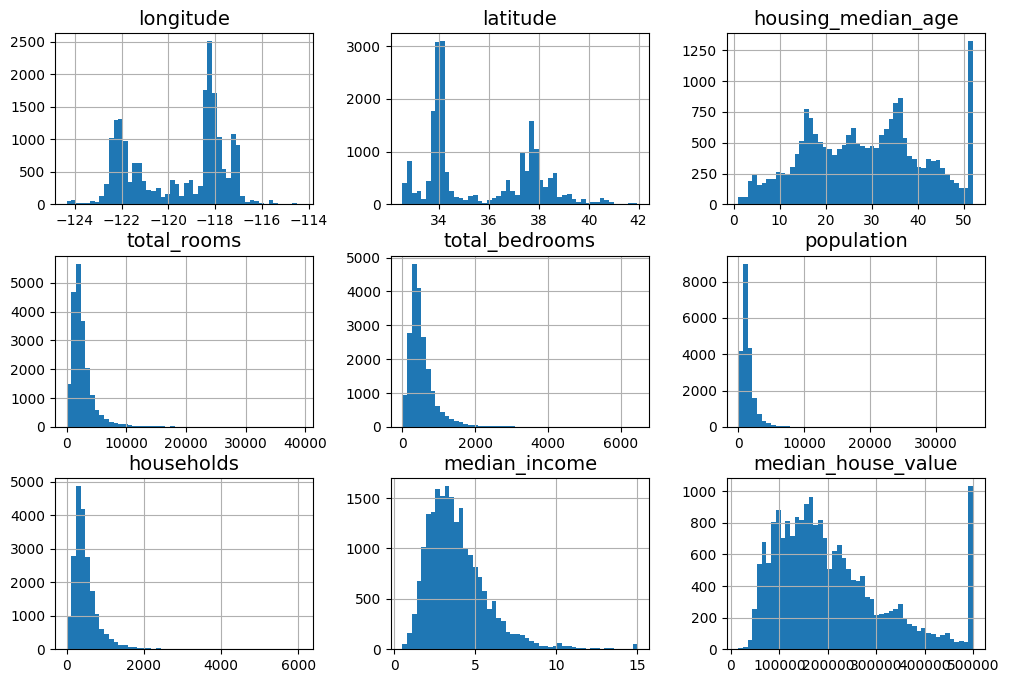

In [46]:
import matplotlib.pyplot as plt

plt.rc('font', size = 14)
plt.rc('axes', labelsize = 14, titlesize=14)
plt.rc('legend', fontsize = 14)
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10)

housing.hist(bins = 50, figsize=(12,8))
plt.show()

Observando estos histogramas se puede tener un poco de informacion.

* En primer lugar, el atributo de ingreso medio no parece estar expresado en dolares estadounidenses. Despues de verificar con el equipo que los datos recogidos se han escalado y limitado a 15 por ingresos elevados y a 0.5 para ingresos bajos. Los numeros representan diezmiles de dolares, trabajar con datos preprocesados es comun en machine learning, y esto no es necesariamente un problema, pero deberias intentar entender como se calcularon los datos.
* La edad media de las casas y el valor medio tabien fueron capados. este ultimo puede ser un problema grave ya que es su atributo objetivo. El algoritmo de machine learning pueden aprender que los precios nunca superan ese limite. Es necesario revisar con el equipo si es un problema o no. Si se decide que se necesitan predicciones mas alla de $500.000 entonces se tienen dos opciones:
    - Recolectar etiquetas adecuadas para los distritos cuyas etiquetas fueron limitadas.
    - Remover estos distritos de los datos de entrenamiento y los datos de de prueba si estos superan los $500.000
* Estos atributos tienen diferentes escalas, esto se descibira despues en el escalamiento de datos
* Finalmente, muchos histogramas estan sesgados hacia la derecha: se extienden mucho mas hacia la derecha de la mediana que hacia la izquierda. Esto puede hacer que algunos algoritmos de aprendizaje automatico les resulte un poco mas dificil de  detectar patrones. Mas adelante se mostrara como transformar estos atributos para que tengan distribuciones mas simetricas y en forma de campana
    

**Crear un conjunto de datos de prueba**

> Antes de seguir analizando datos se debe separar un conjunto de datos 

Puede parecer extraño dejar de lado voluntariamente parte de los dats en esta etapa. Despues de todo, solo se ha hecho un vistazo rapido a los datos y seguramente deberias aprender mucho mas sobre ellos antes de decidir que algoritmo usar, pero su cerebro es un sorprendente sistema de deteccion de patrones, lo que tambien significa que es muy propenso al sobreajuste: si observa el conjunto de pruebas, puede toparse con algun patron aparentemente interesante en los datos de la prueba que le lleve a seleccionar un tipo particular de modelo de aprendizaje automatico. Cuando calcule el error de generalizacion utilizando el conjunto de prueba, su estimacion sera demasiado optimista y lanzara un sistema que no funcionara tan bien como se esperaba. Esto se llama sesgo de espionaje de datos.  
  
Crear un conjunto de datos es teoricamente simple. seleccione algunas instancias ramdon tipicamente el 20% del dataset.

In [47]:
import numpy as np

def shuffle_and_split_data(data, test_ratio): # Se crea una funcion con dos datos de entrada
    # data [array]: Datos ingresados para dividir en entrenamiento y en prueba
    # test_ratio [number]: Porcentaje de datos de prueba
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [48]:
# Se llama a la funcion para separar los datos
# 80% de datos de entrenamiento
# 20% de datos de pruebas
train_set, test_set = shuffle_and_split_data(housing,0.2) 
print(len(train_set))
print(len(test_set))

16512
4128


Para garantizar que los resultados de este cuaderno sigan siendo los mismos cada vez que lo ejecutamos, debemos configurar la semilla aleatoria:

In [49]:
np.random.seed(42)

Sin embargo, ambas soluciones fallarán la próxima vez que obtenga un conjunto de datos actualizado. Para tener una división estable entre tren y prueba incluso después de actualizar el conjunto de datos, una solución común es usar el identificador de cada instancia para decidir si debe incluirse o no en el conjunto de prueba (asumiendo que las instancias tienen identificadores únicos e inmutables). Por ejemplo, podría calcular un hash del identificador de cada instancia y colocar esa instancia en el conjunto de prueba si el hash es menor o igual al 20% del valor hash máximo. Esto garantiza que el conjunto de pruebas se mantendrá coherente en varias ejecuciones, incluso si actualiza el conjunto de datos. El nuevo conjunto de prueba contendrá el 20 % de las nuevas instancias, pero no contendrá ninguna instancia que estuviera previamente en el conjunto de entrenamiento.

In [50]:
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]


Desafortunadamente, el dataset housing no tiene una columna identificadora. La solucion mas simple es utilizar un indice de la fila como el ID

In [51]:
housing_with_id = housing.reset_index() #Se agrega una columna de indice
train_set, test_set = split_data_with_id_hash(housing_with_id,0.2,"index")
print(len(train_set))
print(len(test_set))

16512
4128


Scikit-Learn provee algunas funciones para separar el dataset en subconjuntos de varias formas. La funcion mas simple es *train_test_split*, la cual hace practicamente lo mismo que la funcion creada anteriormente *shuffle_and_split_data()*, con un par de caracteristicas adicionales

In [52]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size = 0.2, random_state=42)
print(len(train_set))
print(len(test_set))

16512
4128


Hasta ahora hemos considerado métodos de muestreo puramente aleatorios. En general, esto está bien si su conjunto de datos es lo suficientemente grande (especialmente en relación con la cantidad de atributos), pero si no lo es, corre el riesgo de introducir un sesgo de muestreo significativo. Cuando los empleados de una empresa de encuestas deciden llamar a 1.000 personas para hacerles algunas preguntas, no eligen simplemente a 1.000 personas al azar en una guía telefónica. Intentan asegurarse de que estas 1.000 personas sean representativas de toda la población, en lo que respecta a las preguntas que quieren plantear. Por ejemplo, la población de EE.UU. está formada por un 51,1% de mujeres y un 48,9% de hombres, por lo que una encuesta bien realizada en EE.UU. intentaría mantener esta proporción en la muestra: 511 mujeres y 489 hombres (al menos si parece posible que las respuestas puedan varían según el género). Esto se llama muestreo estratificado: la población se divide en subgrupos homogéneos llamados estratos, y se muestrea el número correcto de instancias de cada estrato para garantizar que el conjunto de pruebas sea representativo de la población general. Si las personas que realizaron la encuesta utilizaron un muestreo puramente aleatorio, habría aproximadamente un 10,7% de posibilidades de muestrear un conjunto de pruebas sesgado con menos del 48,5% de mujeres o más del 53,5% de mujeres participantes. De cualquier manera, los resultados de la encuesta probablemente estarían bastante sesgados.  
  
Para encontrar la probabilidad de que una muestra aleatoria de 1.000 personas contenga menos del 48,5% de mujeres o más del 53,5% de mujeres cuando la proporción de mujeres de la población es del 51,1%, utilizamos la distribución binomial. El método cdf() de la distribución binomial nos da la probabilidad de que el número de mujeres sea igual o menor que el valor dado.


In [53]:
from scipy.stats import binom

sample_size = 1000
ratio_female = 0.511
proba_too_samll = binom(sample_size, ratio_female).cdf(485-1)
proba_too_large = 1-binom(sample_size,ratio_female).cdf(535)
print(proba_too_samll + proba_too_large)

0.10736798530929942


Supongamos que ha conversado con algunos expertos que le dijeron que el ingreso medio es un atributo muy importante para predecir los precios medios de la vivienda. Es posible que desee asegurarse de que el conjunto de prueba sea representativo de las distintas categorías de ingresos en todo el conjunto de datos. Dado que el ingreso medio es un atributo numérico continuo, primero debe crear un atributo de categoría de ingreso. Miremos más de cerca el histograma del ingreso mediano (en la Figura 2-8): la mayoría de los valores del ingreso mediano se agrupan alrededor de 1,5 a 6 (es decir, entre $15 000 y $60 000), pero algunos ingresos medianos van mucho más allá de 6. Es importante tener un número suficiente de instancias en su conjunto de datos para cada estrato; de lo contrario, la estimación de la importancia de un estrato puede estar sesgada. Esto significa que no debe tener demasiados estratos y cada estrato debe ser lo suficientemente grande. El siguiente código utiliza la función pd.cut() para crear un atributo de categoría de ingresos con cinco categorías (etiquetadas del 1 al 5); la categoría 1 varía de 0 a 1,5 (es decir, menos de $15 000), la categoría 2 de 1,5 a 3, y así sucesivamente:

In [54]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0.,1.5,3.0,4.5,6.0,np.inf],
                               labels=[1,2,3,4,5])

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


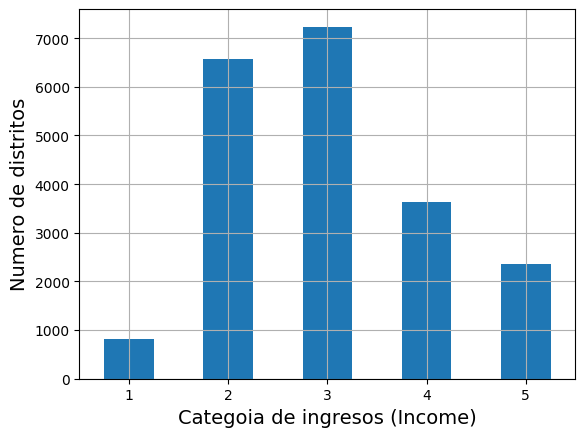

In [55]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0,grid=True)
plt.xlabel("Categoia de ingresos (Income)")
plt.ylabel("Numero de distritos")
plt.show()

Ahora está listo para realizar un muestreo estratificado según la categoría de ingresos. Scikit-Learn proporciona una serie de clases de división en el paquete sklearn.model_selection que implementan varias estrategias para dividir su conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba. Cada divisor tiene un método split() que devuelve un iterador sobre diferentes divisiones de entrenamiento/prueba de los mismos datos.  
  
Para ser precisos, el método split() genera los índices de entrenamiento y prueba, no los datos en sí. Tener múltiples divisiones puede resultar útil si desea estimar mejor el rendimiento de su modelo, como verá cuando analicemos la validación cruzada más adelante en este capítulo. Por ejemplo, el siguiente código genera 10 divisiones estratificadas diferentes del mismo conjunto de datos.

In [56]:
from sklearn.model_selection import StratifiedShuffleSplit
splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits =[]
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_trai_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_trai_set_n,strat_test_set_n])
    
strat_train_set, strat_test_set = strat_splits[0]
#print(strat_train_set)

O, dado que el muestreo estratificado es bastante común, existe una forma más corta de obtener una división única usando la función train_test_split() con el argumento estratificar:

In [57]:
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2,stratify=housing["income_cat"], random_state=42)
print(strat_test_set["income_cat"].value_counts()/len(strat_test_set))


income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64


In [58]:

for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

**Exploracion y visualizacion de datos para obtener informacion**  
  
Hasta ahora sólo ha echado un vistazo rápido a los datos para obtener una comprensión general del tipo de datos que está manipulando. Ahora el objetivo es profundizar un poco más. Primero, asegúrese de haber dejado a un lado el conjunto de pruebas y de que solo esté explorando el conjunto de entrenamiento. Además, si el conjunto de entrenamiento es muy grande, es posible que desee probar un conjunto de exploración para que las manipulaciones sean fáciles y rápidas durante la fase de exploración. En este caso, el conjunto de entrenamiento es bastante pequeño, por lo que puedes trabajar directamente en el conjunto completo. Dado que vas a experimentar con varias transformaciones del conjunto de entrenamiento completo, debes hacer una copia del original para poder volver a él después:

**Visualizacion geografica de los datos**

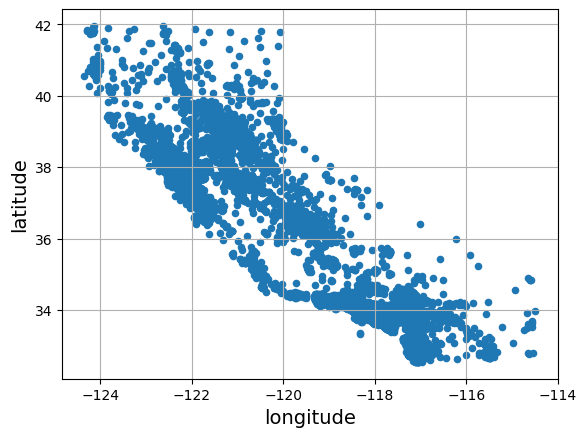

In [59]:
housing = strat_train_set.copy()

housing.plot(kind='scatter',x='longitude',y='latitude',grid=True)
plt.show()

Esto se parece a California, pero aparte de eso es difícil ver algún patrón en particular. Establecer la opción alfa en 0,2 hace que sea mucho más fácil visualizar los lugares donde hay una alta densidad de puntos de datos:

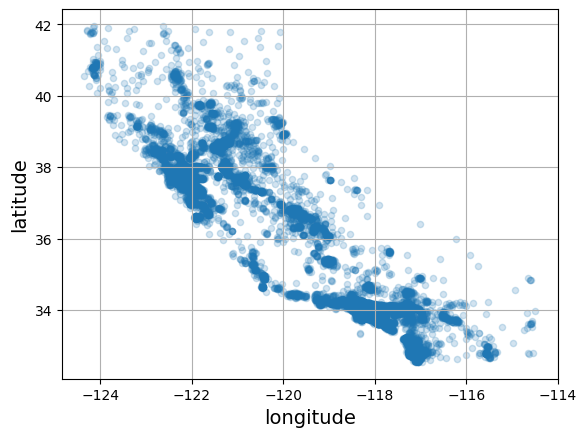

In [60]:
housing.plot(kind='scatter', x='longitude', y='latitude',grid=True, alpha=0.2)
plt.show()

Ahora se puede ver mas claramente las areas con alta densidad:
- Bay Area
- Alrededor de Los Angeles
- San Diego
- Valle central (en particular Sacramento y Fresno)  
  
  
A continuación, nos fijamos en los precios de la vivienda (Figura 2-13). El radio de cada círculo representa la población del distrito (opción s) y el color representa el precio (opción c). Aquí se utiliza un mapa de colores predefinido (opción cmap) llamado jet, que va del azul (valores bajos) al rojo (precios altos):

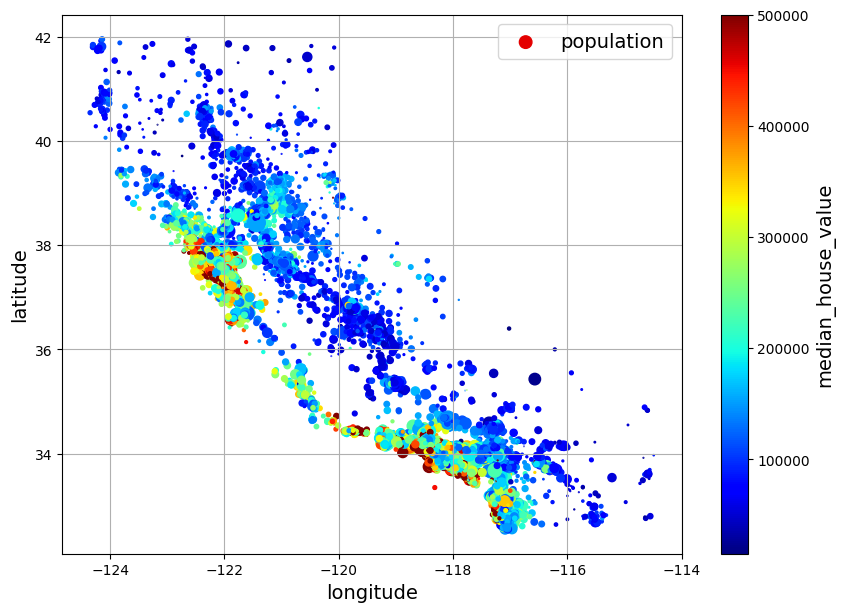

In [61]:
housing.plot(kind='scatter',x='longitude',y='latitude', grid=True,
             s=housing['population']/100,label='population',
             c='median_house_value', cmap='jet', legend='True',
             sharex=False, figsize=(10,7))
plt.show()

Esta imagen le indica que los precios de la vivienda están muy relacionados con la ubicación (por ejemplo, cerca del océano) y con la densidad de población, como probablemente ya sabía. Un algoritmo de agrupamiento debería ser útil para detectar el grupo principal y agregar nuevas características que midan la proximidad a los centros del grupo. El atributo de proximidad al océano también puede ser útil, aunque en el norte de California los precios de la vivienda en los distritos costeros no son demasiado altos, por lo que no es una regla sencilla.

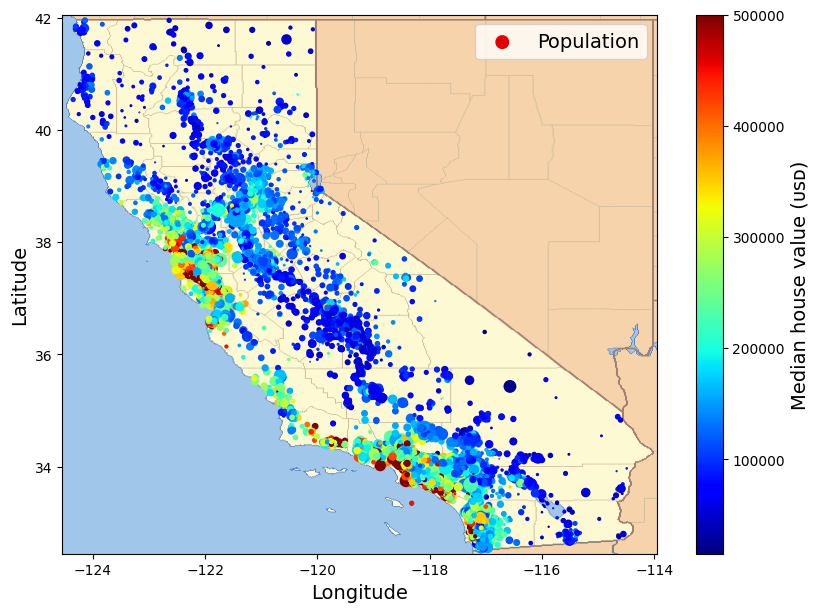

In [62]:
# Download the California image
IMAGES_PATH = Path() / "images" / "fundamentals"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)
filename = "california.png"
if not (IMAGES_PATH / filename).is_file():
    homl3_root = "https://github.com/ageron/handson-ml3/raw/main/"
    url = homl3_root + "images/end_to_end_project/" + filename
    print("Downloading", filename)
    urllib.request.urlretrieve(url, IMAGES_PATH / filename)

housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
housing_renamed.plot(
             kind="scatter", x="Longitude", y="Latitude",
             s=housing_renamed["Population"] / 100, label="Population",
             c="Median house value (ᴜsᴅ)", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))

california_img = plt.imread(IMAGES_PATH / filename)
axis = -124.55, -113.95, 32.45, 42.05
plt.axis(axis)
plt.imshow(california_img, extent=axis)

plt.show()

**Buscar Correlaciones**  
  
Dado que el conjunto de datos no es demasiado grande, puedes calcular fácilmente el coeficiente de correlación estándar (también llamado r de Pearson) entre cada par de atributos usando el método corr():

In [63]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix['median_house_value'].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

In [64]:
print(corr_matrix)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924213           -0.102937     0.044558   
latitude            -0.924213  1.000000            0.005692    -0.036753   
housing_median_age  -0.102937  0.005692            1.000000    -0.361710   
total_rooms          0.044558 -0.036753           -0.361710     1.000000   
total_bedrooms       0.068210 -0.066391           -0.317978     0.930076   
population           0.104236 -0.115677           -0.301906     0.863967   
households           0.054261 -0.071604           -0.300075     0.916143   
median_income       -0.016542 -0.078137           -0.127043     0.197720   
median_house_value  -0.050859 -0.139584            0.102175     0.137455   

                    total_bedrooms  population  households  median_income  \
longitude                 0.068210    0.104236    0.054261      -0.016542   
latitude                 -0.066391   -0.115677   -0.071604      -0.078137   
housing_

El coeficiente de correlacion va en un rango de -1,1; cuando el coeficiente esta cera de 1 significa que existe una fuerte correlacion positiva, por otro lado cuando el coeficiente esta cerca a -1 significa que hay una fuerte correlacion negativa, por ejemplo
- Una fuerte correlacion positiva se observa entre las variables *median_house_value* y *median_incomes_*, ya que mientras la primera sube la segunda tambien
- Una correlacion negativa se puede observar entre *latitude* y*median_house_value*, el precio tiende a descender cuando nos desplazamos mas al norte.  
  
Otra forma de revisar la correlacion entre atributos es utilizando la funcion *scatter_matrix()* de Pandas, la cual grafica todas las combinaciones entre atributos numericos

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

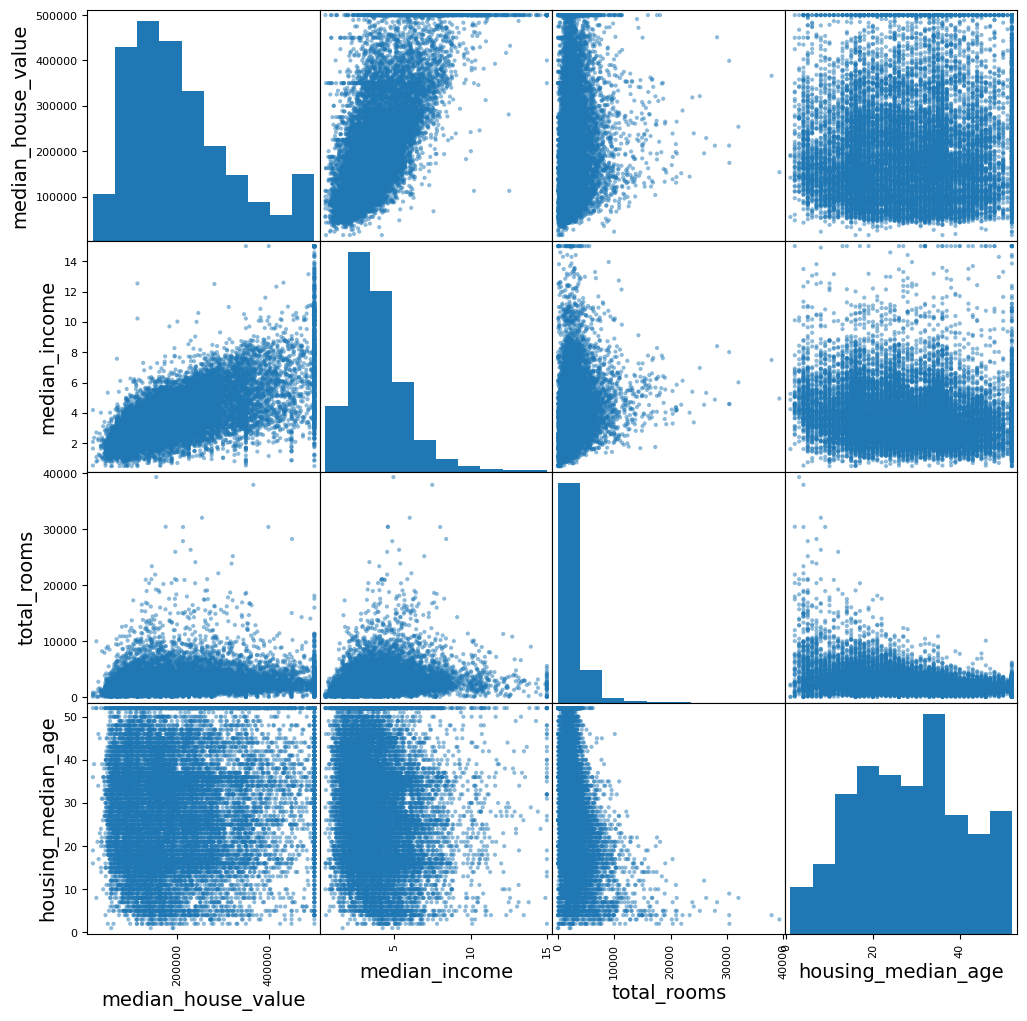

In [65]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(housing[attributes],figsize=(12,12))

Observando las graficas se nota que el atributo mas prometedor para predecir el valor medio de una casa es el ingreso medio.

<Axes: xlabel='median_income', ylabel='median_house_value'>

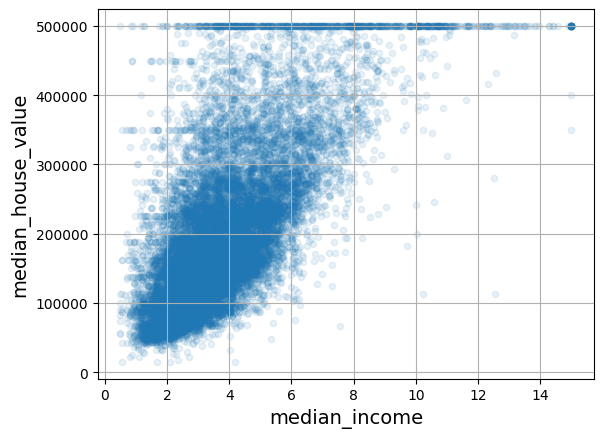

In [66]:
housing.plot(kind = 'scatter',x='median_income',y='median_house_value', alpha=0.1, grid=True)

Esta grafica revela algunas coasas, primero la correlacion es muy fuerte, se puede observar claramente una tendiecia a subir/crecer, y los puntos no estan muy dispersos. Segundo el precio esta limitado como se obseva claramente en la linea horizontal en $500.000, en el grafico tambien se pueden observar al menos otras dos lineas horizontales en $450.00 y $350.000 aproximadamente quizas una mas en $280.000 y unas pocas mas hacia abajo.Es posible que desee intentar eliminar los distritos correspondientes para evitar que sus algoritmos aprendan a reproducir estas peculiaridades de los datos.  
  
> El coeficiente de correlación solo mide correlaciones lineales (“a medida que x aumenta, y generalmente sube/baja”). Es posible que pase por alto por completo las relaciones no lineales (por ejemplo, “a medida que x se acerca a 0, y generalmente aumenta”). La siguiente figura muestra una variedad de conjuntos de datos junto con su coeficiente de correlación. Observe cómo todos los gráficos de la fila inferior tienen un coeficiente de correlación igual a 0, a pesar de que sus ejes claramente no son independientes: estos son ejemplos de relaciones no lineales. Además, la segunda fila muestra ejemplos donde el coeficiente de correlación es igual a 1 o –1; Note que esto no tiene nada que ver con la pendiente. Por ejemplo, su altura en pulgadas tiene un coeficiente de correlación de 1 con su altura en pies o en nanómetros.

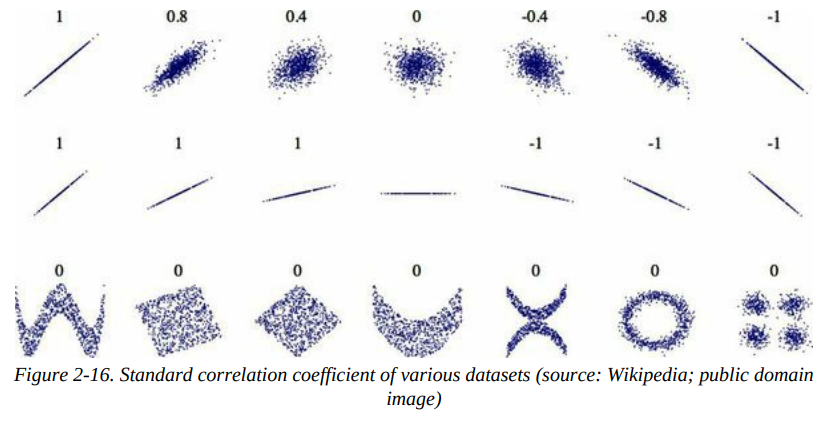

Esperamos que las secciones anteriores le hayan dado una idea de algunas formas en las que puede explorar los datos y obtener información. Identificó algunas peculiaridades de los datos que quizás desee limpiar antes de alimentar los datos a un algoritmo de aprendizaje automático y encontró correlaciones interesantes entre los atributos, en particular con el atributo objetivo. También notó que algunos atributos tienen una distribución asimétrica a la derecha, por lo que es posible que desee transformarlos (por ejemplo, calculando su logaritmo o raíz cuadrada). Por supuesto, su kilometraje variará considerablemente con cada proyecto, pero las ideas generales son similares.  
  
Una última cosa que quizás quieras hacer antes de preparar los datos para los algoritmos de aprendizaje automático es probar varias combinaciones de atributos. Por ejemplo, el número total de habitaciones de un distrito no es muy útil si no se sabe cuántos hogares hay. Lo que realmente desea es la cantidad de habitaciones por hogar. De manera similar, el número total de dormitorios por sí solo no es muy útil: probablemente quieras compararlo con el número de habitaciones. Y la población por hogar también parece una combinación de atributos interesante a considerar. Estos nuevos atributos se crean de la siguiente manera:

In [67]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64

In [68]:
scatter_matrix(housing[['median_income','median_house_value','rooms_per_house','bedrocoms_ratio','people_per_house']],figsize=(12,12))

KeyError: "['bedrocoms_ratio'] not in index"

¡Oye, no está mal! El nuevo atributo beds_ratio está mucho más correlacionado con el valor medio de la casa que con el número total de habitaciones o dormitorios. Aparentemente, las casas con una menor proporción dormitorio/habitación tienden a ser más caras. El número de habitaciones por hogar también es más informativo que el número total de habitaciones en un distrito; obviamente, cuanto más grandes son las casas, más caras son.

Esta ronda de exploración no tiene por qué ser absolutamente exhaustiva; La cuestión es empezar con el pie derecho y obtener rápidamente información que le ayude a conseguir un primer prototipo razonablemente bueno. Pero este es un proceso iterativo: una vez que tienes un prototipo en funcionamiento, puedes analizar su resultado para obtener más información y volver a este paso de exploración.

#### Prepara los datos para el algoritmo de Machine Learning

Ess momento de preparar los datos para el algoritmo de machine learnin, en lugar de hacerlo manualmente se escribiran algunas funciones para este proposito por varias razones:
* Esto permitira que pueda reproducri estas transformaciones facilmente en cualquier dataset
* Construira gradualmente una libreria de funciones de transformacion que podra reusar en futuros proyecto
* Puede utilizar estas funciones en su sistema en vivo para transformar los nuevos datos antes de alimentarlos a sus algoritmos.
* Esto le permitirá probar fácilmente varias transformaciones y ver qué combinación de transformaciones funciona mejor.  
  
Pero primero, vuelva a un conjunto de entrenamiento limpio (copiando strat_train_set una vez más). También debes separar los predictores y las etiquetas, ya que no necesariamente deseas aplicar las mismas transformaciones a los predictores y los valores objetivo (nota que drop() crea una copia de los datos y no afecta a strat_train_set):

In [ ]:
# Se remueve la columna del precio medio para tenerla como un vector con los valores objetivo
housing = strat_train_set.drop("median_house_value",axis=1)
housing_labels = strat_train_set["median_house_value"].copy()


**Limpiar los datos**  
  
La mayoria de algoritmos de machine learnin no pueden trabajar con carateristicas faltantes, entonces es necesario tener cuidado con esto. Por ejemplo como se observo anteriormente la columana de *total_bedrooms* tiene algunos valores faltantes. Se tienen tres opciones para solucionar esto:

- Deshacerse de los distritos correspondientes
- Deshacerse completamente del atributo
- Establecer los valores faltante en algun valor (cero, la media, la mediana, etc). Esto es llamado imputacion

Esto se puede ralizar usando la libreria Pandas con los metodos *dropna()*, *drop()*, *fillna()*


In [72]:
null_rows_idx = housing.isnull().any(axis=1)
#print(null_rows_idx)

# Muestras las instancias que tienen valores nulos en cualquir feture
# En este caso se puede observar que los valores en total_berdrooms y por ende
# bedrooms_ratio tienen valores NaN
housing.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_house,bedrooms_ratio,people_per_house
14452,-120.67,40.50,15.0,5343.0,NaN,2503.0,902.0,3.5962,85900.0,INLAND,5.923503,NaN,2.774945
18217,-117.96,34.03,35.0,2093.0,NaN,1755.0,403.0,3.4115,150400.0,<1H OCEAN,5.193548,NaN,4.354839
11889,-118.05,34.04,33.0,1348.0,NaN,1098.0,257.0,4.2917,161200.0,<1H OCEAN,5.245136,NaN,4.272374
20325,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN,6.367713,NaN,2.542601
14360,-117.87,33.62,8.0,1266.0,NaN,375.0,183.0,9.8020,500001.0,<1H OCEAN,6.918033,NaN,2.049180


In [74]:
housing_option1 = housing.copy()
housing_option1.dropna(subset=['total_bedrooms','bedrooms_ratio'], inplace=True)
housing_option1.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_house,bedrooms_ratio,people_per_house


In [76]:
housing_option2 = housing.copy()
housing_option2.drop(["total_bedrooms","bedrooms_ratio"], axis = 1, inplace = True)
housing_option2.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_house,people_per_house
14452,-120.67,40.50,15.0,5343.0,2503.0,902.0,3.5962,85900.0,INLAND,5.923503,2.774945
18217,-117.96,34.03,35.0,2093.0,1755.0,403.0,3.4115,150400.0,<1H OCEAN,5.193548,4.354839
11889,-118.05,34.04,33.0,1348.0,1098.0,257.0,4.2917,161200.0,<1H OCEAN,5.245136,4.272374
20325,-118.88,34.17,15.0,4260.0,1701.0,669.0,5.1033,410700.0,<1H OCEAN,6.367713,2.542601
14360,-117.87,33.62,8.0,1266.0,375.0,183.0,9.8020,500001.0,<1H OCEAN,6.918033,2.049180


In [81]:
housing_option3 = housing.copy()

median1 = housing_option3["total_bedrooms"].median()
median2 = housing_option3["bedrooms_ratio"].median()

housing_option3["total_bedrooms"].fillna(median1, inplace=True)
housing_option3["bedrooms_ratio"].fillna(median2, inplace =True)

housing_option3.loc[null_rows_idx].head()

C:\Users\luis-\AppData\Local\Temp\ipykernel_13476\1627880536.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing_option3["total_bedrooms"].fillna(median1, inplace=True)
C:\Users\luis-\AppData\Local\Temp\ipykernel_13476\1627880536.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_house,bedrooms_ratio,people_per_house
14452,-120.67,40.50,15.0,5343.0,434.0,2503.0,902.0,3.5962,85900.0,INLAND,5.923503,0.203106,2.774945
18217,-117.96,34.03,35.0,2093.0,434.0,1755.0,403.0,3.4115,150400.0,<1H OCEAN,5.193548,0.203106,4.354839
11889,-118.05,34.04,33.0,1348.0,434.0,1098.0,257.0,4.2917,161200.0,<1H OCEAN,5.245136,0.203106,4.272374
20325,-118.88,34.17,15.0,4260.0,434.0,1701.0,669.0,5.1033,410700.0,<1H OCEAN,6.367713,0.203106,2.542601
14360,-117.87,33.62,8.0,1266.0,434.0,375.0,183.0,9.8020,500001.0,<1H OCEAN,6.918033,0.203106,2.049180


Decides optar por la opción 3 porque es la menos destructiva, pero en lugar del código anterior, utilizarás una práctica clase de Scikit-Learn: SimpleImputer. El beneficio es que almacenará el valor mediano de cada característica: esto permitirá imputar valores faltantes no solo en el conjunto de entrenamiento, sino también en el conjunto de validación, el conjunto de prueba y cualquier dato nuevo introducido en el modelo. Para usarlo, primero necesita crear una instancia de SimpleImputer, especificando que desea reemplazar los valores faltantes de cada atributo con la mediana de ese atributo:

In [84]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

Debido a que la media solo se puede calcular en atriburos numericos, es necesario hacer una copia de los datos que contenga solo los atributos numericos.

In [82]:
housing_num = housing.select_dtypes(include=[np.number])
housing_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_house,bedrooms_ratio,people_per_house
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,3.211799,0.335742,1.524178
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,5.504202,0.180153,1.865546
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,5.334975,0.200369,2.768473
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,5.351282,0.203881,2.365385
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,3.725256,0.277371,1.631399


Ahora puedes ajustar la instancia del imputador a los datos de entrenamiento usando el método *fit()*

In [92]:
imputer.fit(housing_num)
print(imputer.statistics_)
print(housing_num.median().values)

[-1.18510000e+02  3.42600000e+01  2.90000000e+01  2.12500000e+03
  4.34000000e+02  1.16700000e+03  4.08000000e+02  3.53850000e+00
  1.79200000e+05  5.23557310e+00  2.03105786e-01  2.82231619e+00]
[-1.18510000e+02  3.42600000e+01  2.90000000e+01  2.12500000e+03
  4.34000000e+02  1.16700000e+03  4.08000000e+02  3.53850000e+00
  1.79200000e+05  5.23557310e+00  2.03105786e-01  2.82231619e+00]


Ahora puedes usar este imputador "entrenado" para transformar el conjunto de entrenamiento reemplazando los valores faltantes con las medianas aprendidas:

In [96]:

X = imputer.transform(housing_num)


In [97]:
imputer.feature_names_in_

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'rooms_per_house', 'bedrooms_ratio',
       'people_per_house'], dtype=object)

In [101]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,index=housing_num.index)
housing_tr.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_house,bedrooms_ratio,people_per_house
14452,-120.67,40.50,15.0,5343.0,434.0,2503.0,902.0,3.5962,85900.0,5.923503,0.203106,2.774945
18217,-117.96,34.03,35.0,2093.0,434.0,1755.0,403.0,3.4115,150400.0,5.193548,0.203106,4.354839
11889,-118.05,34.04,33.0,1348.0,434.0,1098.0,257.0,4.2917,161200.0,5.245136,0.203106,4.272374
20325,-118.88,34.17,15.0,4260.0,434.0,1701.0,669.0,5.1033,410700.0,6.367713,0.203106,2.542601
14360,-117.87,33.62,8.0,1266.0,434.0,375.0,183.0,9.8020,500001.0,6.918033,0.203106,2.049180


In [102]:
imputer.strategy

'median'

In [104]:
# Ahora descartemos algunos valores atipicos
from sklearn.ensemble import IsolationForest

isolation_forest= IsolationForest(random_state=42)
outlier_pred = isolation_forest.fit_predict(X)

outlier_pred

array([-1,  1,  1, ...,  1,  1, -1])

Si quiere eliminar los valores atipicos, podria utilizar el siguiente codigo

In [105]:
#housing = housing.iloc[outlier_pred == 1]
#housing_labels = housing_labels.iloc[outlier_pred == 1]